## PRCP-1001-RiceLeaf  & Team Code - PTID-CDS-DEC21-1251 - File no.5

### Data loading, modeling using CNN, Accuracy plots and Loss plots, and prediction

In [100]:
import matplotlib.pyplot as plt #for plotting the required data 
import pandas as pd # to deal with dataframes if needed
import seaborn as sns  #for plotting
#import plotly.express as px  #a better and handy tool with less complexity for plotting
import numpy as np # for handling mutlidimensional array
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Flatten, Dense,Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import os
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [101]:
# leaf_blight_images
leaf_array = []
for x in range(1000,1790):
    str_x = str(x)
    file_name = r"E://Test1/PRCP-1001-RiceLeaf/Data/train/Bacterial leaf blight/C"+str_x+".JPG"
    try:
        img = load_img(file_name)
    except :
        print("not found")
    img = img.resize([256,256])
    leaf_array.append(img)

not found
not found


In [102]:
# brown_spot_images
brown_array = []
for x in range(2000,2790):
    str_x = str(x)
    file_name = r"E:\Test1\PRCP-1001-RiceLeaf\Data\train\Brown spot\C"+str_x+".JPG"
    try:
        img = load_img(file_name)
    except :
        print("not found")
    img = img.resize([256,256])
    #imgarray = img_to_array(img)
    brown_array.append(img)

not found
not found


In [103]:
# leaf_smut_images
leaf_smut = []
for x in range(3000,3770):
    str_x = str(x)
    file_name = r"E:\Test1\PRCP-1001-RiceLeaf\Data\train\Leaf smut\C"+str_x+".JPG"
    try:
        img = load_img(file_name)
    except :
        print("not found")
    img = img.resize([256,256])
    #imgarray = img_to_array(img)
    leaf_smut.append(img)

not found
not found
not found


In [104]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             fill_mode ="reflect")
valid_datagen = ImageDataGenerator(rescale=1/255)

In [105]:
BATCH_SIZE= 32
train_generator = train_datagen.flow_from_directory("E://Test1/PRCP-1001-RiceLeaf/Data/train/",
                                             target_size=(256,256),
                                             batch_size=BATCH_SIZE,
                                             class_mode ='categorical')
valid_generator = valid_datagen.flow_from_directory("E://Test1/PRCP-1001-RiceLeaf/Data/valid/",
                                             target_size=(256,256),
                                             batch_size=BATCH_SIZE,
                                             class_mode ='categorical')

Found 2343 images belonging to 3 classes.
Found 504 images belonging to 3 classes.


In [106]:
#seqential model
model = Sequential()

#pass1 
model.add(Conv2D(64, kernel_size=(3,3), input_shape=(256, 256, 3)))
model.add(Activation('elu'))
model.add(MaxPool2D(pool_size=(3,3)))
#pass2
model.add(Conv2D(64, kernel_size=(3,3)))
model.add(Activation('elu'))
model.add(MaxPool2D(pool_size=(3,3)))
#pass3
model.add(Conv2D(128, kernel_size=(3,3)))
model.add(Activation('elu'))
model.add(MaxPool2D(pool_size=(3,3)))
#pass4
model.add(Conv2D(128, kernel_size=(3,3)))
model.add(Activation('elu'))
model.add(MaxPool2D(pool_size=(3,3)))


#flatten
model.add(Flatten())

from tensorflow.keras.layers import Dropout
#ann
model.add(Dense(128))
model.add(Activation('elu'))
model.add(Dropout(0.4)) #drop neurons to decrease no.of neurons

model.add(Dense(64))
model.add(Activation('elu'))
model.add(Dropout(0.4)) #drop neurons to decrease no.of neurons 

model.add(Dense(32))
model.add(Activation('elu'))
model.add(Dropout(0.4))

model.add(Dense(3))
model.add(Activation('softmax'))

In [135]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 activation_16 (Activation)  (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 84, 84, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 82, 82, 64)        36928     
                                                                 
 activation_17 (Activation)  (None, 82, 82, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 27, 27, 64)       0         
 2D)                                                  

In [107]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(),
              loss = "categorical_crossentropy",
              metrics =["accuracy"]
             )

In [153]:
#model_checkpoint
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

chckpoint = ModelCheckpoint(r"E:\Test1\bestfit.h5",
                            monitor='val_accuracy',
                            save_best_only=True,
                            verbose=1,
                            mode="max")
callbacks_list=[chckpoint]

In [154]:
#early stopping
earlystop = EarlyStopping(monitor='val_accuracy',
                          mode="max",
                          min_delta=0.001,
                          patience=15,
                          verbose=10,
                         )

In [155]:
#reduceLROnPlateau
reducelr = ReduceLROnPlateau(monitor='val_accuracy',
                             patience=8,
                             verbose=5,
                             mode='max',
                             min_delta=0,
                             min_lr = 0
                            )

In [156]:
hist = model.fit(train_generator,
                           steps_per_epoch=978//BATCH_SIZE,
                           epochs=25,
                           verbose=1,
                           validation_data=valid_generator,
                           validation_steps=538//BATCH_SIZE,)

Epoch 1/25
30/30 [==============================] - 125s 4s/step - loss: 1.1926 - accuracy: 0.3927 - val_loss: 1.0660 - val_accuracy: 0.4722
Epoch 2/25
30/30 [==============================] - 113s 4s/step - loss: 1.1097 - accuracy: 0.4292 - val_loss: 1.1159 - val_accuracy: 0.3333
Epoch 3/25
30/30 [==============================] - 114s 4s/step - loss: 1.0592 - accuracy: 0.4674 - val_loss: 1.0563 - val_accuracy: 0.4583
Epoch 4/25
30/30 [==============================] - 112s 4s/step - loss: 1.0210 - accuracy: 0.4845 - val_loss: 1.1229 - val_accuracy: 0.4325
Epoch 5/25
30/30 [==============================] - 103s 3s/step - loss: 0.9873 - accuracy: 0.5112 - val_loss: 1.0042 - val_accuracy: 0.4782
Epoch 6/25
30/30 [==============================] - 103s 3s/step - loss: 0.9386 - accuracy: 0.5458 - val_loss: 0.9809 - val_accuracy: 0.4683
Epoch 7/25
30/30 [==============================] - 104s 3s/step - loss: 1.0231 - accuracy: 0.4948 - val_loss: 1.4734 - val_accuracy: 0.3333
Epoch 8/25
30

In [158]:
model.save("bestfit.h5")


In [159]:
no_of_epochs_performed = len(hist.history["val_accuracy"])

In [160]:
no_of_epochs_performed

25

### Accuracy Plots & Loss Plots

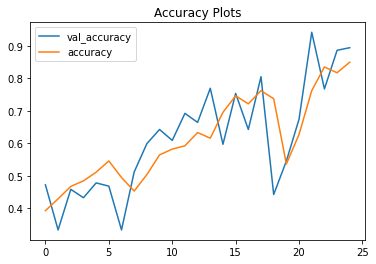

In [161]:
plt.plot(range(no_of_epochs_performed),hist.history["val_accuracy"])
plt.plot(range(no_of_epochs_performed),hist.history["accuracy"])
plt.legend(["val_accuracy","accuracy"])
plt.title("Accuracy Plots")
plt.show()

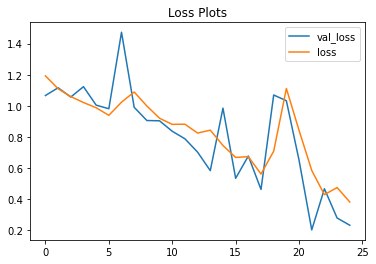

In [162]:
plt.plot(range(no_of_epochs_performed),hist.history["val_loss"])
plt.plot(range(no_of_epochs_performed),hist.history["loss"])
plt.legend(["val_loss","loss"])
plt.title("Loss Plots")
plt.show()

### Image Classification name

In [173]:
Name=[]
for file in os.listdir(directory):
    Name+=[file]
print(Name)
print(len(Name))

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
3


### First image prediction

In [163]:
# loading the image
img = load_img(r"E:\Test1\PRCP-1001-RiceLeaf\Data\valid\Brown spot\C5008.jpg")    

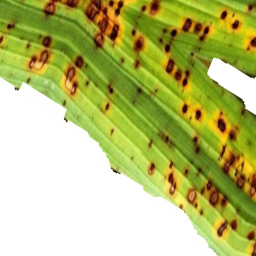

In [164]:
img

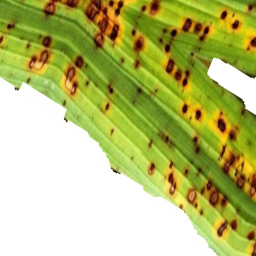

In [165]:
img.resize((256,256))

In [166]:
img = img_to_array(img)
img.shape


(256, 256, 3)

In [167]:
img = img.reshape((1,256,256,3))/255
img.shape

(1, 256, 256, 3)

In [169]:
from tensorflow.keras.models import load_model
model1 = load_model("bestfit.h5")
pred = model1.predict(img)


In [170]:
pred = model1.predict(img)

In [171]:
pred

array([[0.0011527 , 0.86214095, 0.13670634]], dtype=float32)

In [172]:
np.argmax(pred)


1

### Second image prediction

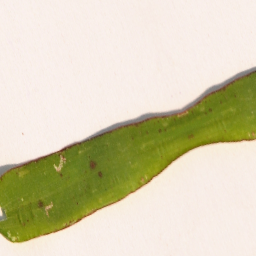

In [176]:
# loading the image
img = load_img(r"E:\Test1\PRCP-1001-RiceLeaf\Data\valid\Leaf smut\C6016.jpg")  
img

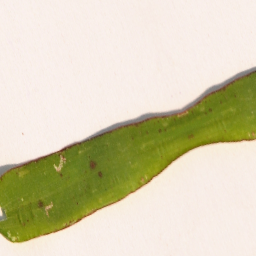

In [177]:
img.resize((256,256))

In [178]:
img = img_to_array(img)
img.shape


(256, 256, 3)

In [179]:
img = img.reshape((1,256,256,3))/255
img.shape

(1, 256, 256, 3)

In [180]:
from tensorflow.keras.models import load_model
model1 = load_model("bestfit.h5")
pred = model1.predict(img)


In [181]:
pred = model1.predict(img)

In [182]:
pred

array([[0.00450644, 0.1272995 , 0.86819404]], dtype=float32)

In [183]:
np.argmax(pred)


2